In [1]:
# importing necessary package
import numpy as np
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ARDRegression
import sklearn.linear_model

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into python
data_df = pd.read_excel(io=file)

data_df.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
# creating dictionary to help in identifying features faster. 

# dependent variables
dependent_variable = "REVENUE"


# independent variables
original_features = {
    "binary": [
        "CROSS_SELL_SUCCESS",
        "MOBILE_NUMBER",
        "TASTES_AND_PREFERENCES",
        "PACKAGE_LOCKER",
        "REFRIGERATED_LOCKER"
    ],
    "discrete": [
        "TOTAL_MEALS_ORDERED",
        "UNIQUE_MEALS_PURCH",
        "CONTACTS_W_CUSTOMER_SERVICE",
        "WEEKLY_PLAN",
        "TOTAL_PHOTOS_VIEWED"
    ],
    "categorical": [
        "PRODUCT_CATEGORIES_VIEWED",
        "CANCELLATIONS_BEFORE_NOON",
        "CANCELLATIONS_AFTER_NOON",
        "MOBILE_LOGINS",
        "PC_LOGINS",
        "EARLY_DELIVERIES",
        "LATE_DELIVERIES",
        "FOLLOWED_RECOMMENDATIONS_PCT",
        "LARGEST_ORDER_SIZE",
        "MASTER_CLASSES_ATTENDED",
        "MEDIAN_MEAL_RATING",
        "AVG_CLICKS_PER_VISIT"
    ],
    "continuous": [
        "AVG_TIME_PER_SITE_VISIT",
        "AVG_PREP_VID_TIME"
    ],
    "other": [
        "NAME",
        "EMAIL",
        "FIRST_NAME",
        "FAMILY_NAME"
    ]
}

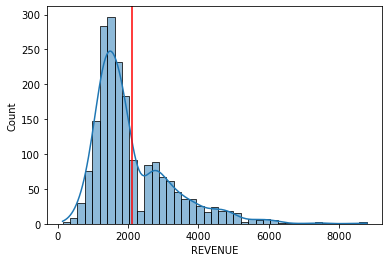

In [3]:
# quick check for normal distribution

sns.histplot(
    x= data_df[dependent_variable],
    kde=True
)
plt.axvline(data_df[dependent_variable].describe()["mean"], 0, 1, color="red")
plt.show()

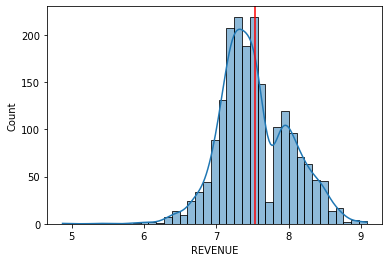

In [4]:
# Quick check for normal distribution with Log

transformed_data = data_df[dependent_variable].apply(np.log)

sns.histplot(
    x=transformed_data,
    kde=True
)
plt.axvline(transformed_data.describe()["mean"], 0, 1, color="red")
plt.show()


In [5]:
# checking missing variables

data_df.isnull().sum(axis = 0)

# as the missing value is only for FAMILY_NAME, I will ignore it as it is not relevant to my regression. 

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [6]:
# after checking the data, I decide to remove inconsistencies in LARGEST_ORDER_SIZE
data_df = data_df[data_df['LARGEST_ORDER_SIZE'] > 0] 

In [7]:
# creating feature engineer 

# transforming dependent features
data_df['ln_REVENUE'] = np.log(data_df['REVENUE'])

# transforming independent features
data_df['ln_TOTAL_PHOTOS_VIEWED'] = data_df['TOTAL_PHOTOS_VIEWED']
data_df.loc[data_df['TOTAL_PHOTOS_VIEWED'] != 0, 'ln_TOTAL_PHOTOS_VIEWED'] = data_df['TOTAL_PHOTOS_VIEWED'].apply(np.log)

data_df['ln_UNIQUE_MEALS_PURCH'] = data_df['UNIQUE_MEALS_PURCH']
data_df.loc[data_df['UNIQUE_MEALS_PURCH'] != 0, 'ln_UNIQUE_MEALS_PURCH'] = data_df['UNIQUE_MEALS_PURCH'].apply(np.log)

data_df['ln_AVG_PREP_VID_TIME'] = data_df['AVG_PREP_VID_TIME']
data_df.loc[data_df['AVG_PREP_VID_TIME'] != 0, 'ln_AVG_PREP_VID_TIME'] = data_df['AVG_PREP_VID_TIME'].apply(np.log)

data_df['ln_TOTAL_MEALS_ORDERED'] = data_df['TOTAL_MEALS_ORDERED']
data_df.loc[data_df['TOTAL_MEALS_ORDERED'] != 0, 'ln_TOTAL_MEALS_ORDERED'] = data_df['TOTAL_MEALS_ORDERED'].apply(np.log)


# flagging trends

def flag_outliers_trends(data_df: pd.DataFrame, flags: dict, inplace:bool=False) -> pd.DataFrame:
    """
    Allows to flag records that belong to an outlier or a trend. It receives 
    a dictionary that specifices the conditions under which the flagging will 
    be done per each variable.
    
    """

data_df['tre_AVG_CLICKS_PER_VISIT'] = 0
data_df.loc[data_df['AVG_CLICKS_PER_VISIT'] > 11, 'tre_AVG_CLICKS_PER_VISIT'] = 1

data_df['tre_LARGEST_ORDER_SIZE'] = 0
data_df.loc[data_df['LARGEST_ORDER_SIZE'] > 8, 'tre_LARGEST_ORDER_SIZE'] = 1

data_df['tre_MEDIAN_MEAL_RATING'] = 0
data_df.loc[data_df['MEDIAN_MEAL_RATING'] > 3, 'tre_MEDIAN_MEAL_RATING'] = 1

data_df['tre_CONTACTS_W_CUSTOMER_SERVICE'] = 0
data_df.loc[data_df['CONTACTS_W_CUSTOMER_SERVICE'] > 10, 'tre_CONTACTS_W_CUSTOMER_SERVICE'] = 1

# Create new features
data_df['SOME'] = 0
data_df.loc[
    (data_df['WEEKLY_PLAN'] > 0) & (data_df['WEEKLY_PLAN'] < 15),
    'SOME'
] = 1

data_df['SINGLE_MEAL'] = 0
data_df.loc[data_df['UNIQUE_MEALS_PURCH'] == 1, 'SINGLE_MEAL'] = 1

data_df.head(n=5) # checking the result

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,ln_REVENUE,ln_TOTAL_PHOTOS_VIEWED,ln_UNIQUE_MEALS_PURCH,ln_AVG_PREP_VID_TIME,ln_TOTAL_MEALS_ORDERED,tre_AVG_CLICKS_PER_VISIT,tre_LARGEST_ORDER_SIZE,tre_MEDIAN_MEAL_RATING,tre_CONTACTS_W_CUSTOMER_SERVICE,SOME,SINGLE_MEAL
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,5.973810,0.000000,1.791759,3.508556,2.639057,1,0,0,1,0,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,7.218910,5.135798,1.098612,4.440296,4.465908,1,0,0,0,1,0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,6.684612,0.000000,1.945910,4.143135,2.708050,1,0,0,1,1,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,6.396930,0.000000,1.791759,3.779634,2.564949,1,0,0,1,1,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,7.306531,5.323010,2.079442,4.440296,3.850148,1,0,0,0,1,0


In [8]:
# creating a (Pearson) correlation matrix
data_df = data_df.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(data_df.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
ln_REVENUE                         0.95
AVG_PREP_VID_TIME                  0.64
ln_AVG_PREP_VID_TIME               0.63
MEDIAN_MEAL_RATING                 0.61
ln_TOTAL_MEALS_ORDERED             0.61
TOTAL_MEALS_ORDERED                0.60
tre_MEDIAN_MEAL_RATING             0.59
TOTAL_PHOTOS_VIEWED                0.47
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
ln_TOTAL_PHOTOS_VIEWED             0.42
SINGLE_MEAL                        0.21
AVG_TIME_PER_SITE_VISIT            0.14
CONTACTS_W_CUSTOMER_SERVICE        0.10
tre_LARGEST_ORDER_SIZE             0.09
PRODUCT_CATEGORIES_VIEWED          0.03
MOBILE_NUMBER                      0.03
PC_LOGINS                          0.02
TASTES_AND_PREFERENCES             0.01
WEEKLY_PLAN                        0.01
CANCELLATIONS_BEFORE_NOON          0.01
CROSS_SELL_SUCCESS                 0.00
REFRIGERATED_LOCKER               -0.00
EARLY_DELIVERIES                  -0.00


In [9]:
# saving results
data_df.to_excel('Apprentice_Chef_Dataset_Rich.xlsx',
                 index = False)

In [10]:
# creating Train-Test Split

new_features=[
    'tre_AVG_CLICKS_PER_VISIT',
    'ln_TOTAL_PHOTOS_VIEWED',
    'ln_UNIQUE_MEALS_PURCH',
    'SOME',
    'tre_LARGEST_ORDER_SIZE',
    'LARGEST_ORDER_SIZE',
    'CONTACTS_W_CUSTOMER_SERVICE',
    'MASTER_CLASSES_ATTENDED',
    'MEDIAN_MEAL_RATING',
    'ln_TOTAL_MEALS_ORDERED',
    'tre_MEDIAN_MEAL_RATING',
    'tre_CONTACTS_W_CUSTOMER_SERVICE',
    'SINGLE_MEAL',
    'ln_AVG_PREP_VID_TIME'
]

transformed_dependent = 'ln_REVENUE'

In [11]:
# looping to make features faster for statsmodels
for val in new_features:
    print(f"{val} +")


tre_AVG_CLICKS_PER_VISIT +
ln_TOTAL_PHOTOS_VIEWED +
ln_UNIQUE_MEALS_PURCH +
SOME +
tre_LARGEST_ORDER_SIZE +
LARGEST_ORDER_SIZE +
CONTACTS_W_CUSTOMER_SERVICE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
ln_TOTAL_MEALS_ORDERED +
tre_MEDIAN_MEAL_RATING +
tre_CONTACTS_W_CUSTOMER_SERVICE +
SINGLE_MEAL +
ln_AVG_PREP_VID_TIME +


In [12]:
# preparing x-variables
new_data = data_df[new_features]

# preparing y-variable
data_target = data_df[transformed_dependent]

# prepating train-test set (test_size should be 0.25 and random_state should be 219)
x_train, x_test, y_train, y_test = train_test_split(
            new_data,     # x-variables
            data_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (26, 14)
y-side: (26,)


Testing Data
------------
X-side: (9, 14)
y-side: (9,)



In [13]:
# step 1: Build a model
lm_best = smf.ols(formula = """ ln_REVENUE ~ tre_AVG_CLICKS_PER_VISIT +
                                             ln_TOTAL_PHOTOS_VIEWED +
                                             ln_UNIQUE_MEALS_PURCH +
                                             SOME +
                                             tre_LARGEST_ORDER_SIZE +
                                             LARGEST_ORDER_SIZE +
                                             CONTACTS_W_CUSTOMER_SERVICE +
                                             MASTER_CLASSES_ATTENDED +
                                             MEDIAN_MEAL_RATING +
                                             ln_TOTAL_MEALS_ORDERED +
                                             tre_MEDIAN_MEAL_RATING +
                                             tre_CONTACTS_W_CUSTOMER_SERVICE +
                                             SINGLE_MEAL +
                                             ln_AVG_PREP_VID_TIME """,
                    data = data_df)

# step 2: fit the model based on the data
results = lm_best.fit()


# step 3: summary output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_REVENUE   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     165.4
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.62e-17
Time:                        19:32:11   Log-Likelihood:                 67.794
No. Observations:                  35   AIC:                            -105.6
Df Residuals:                      20   BIC:                            -82.26
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.0032      0.011     -0.283      0.780      -0.027       0.020
tre_AVG_CLICKS_PER_VISIT            0.0848      0.128      0.663      0.515      -0.182       0.352
ln_TOTAL_PHOTOS_VIEWED              0.0351      0.051      0.682      0.503      -0.072       0.142
ln_UNIQUE_MEALS_PURCH               0.1012      0.079      1.280      0.215      -0.064       0.266
SOME                               -0.0229      0.045     -0.510      0.616      -0.117       0.071
tre_LARGEST_ORDER_SIZE              0.0281      0.068      0.412      0.685      -0.114       0.171
LARGEST_ORDER_SIZE                 -0.2660      0.184     -1.448      0.163      -0.649       0.117
CONTACTS_W_CUSTOMER_SERVICE         0.4122      0.156      2.639      0.016       0.086       0.738
MASTER_CLASSES_ATTENDED             0.0642      0.067      0.952      0.353      -0.076       0.205
MEDIAN_MEAL_RATING                  0.0226      0.111      0.203      0.841      -0.210       0.255
ln_TOTAL_MEALS_ORDERED              0.2048      0.103      1.981      0.061      -0.011       0.420
tre_MEDIAN_MEAL_RATING              0.2972      0.151      1.966      0.063      -0.018       0.613
tre_CONTACTS_W_CUSTOMER_SERVICE    -0.5472      0.210     -2.610      0.017      -0.985      -0.110
SINGLE_MEAL                         0.4563      0.089      5.118      0.000       0.270       0.642
ln_AVG_PREP_VID_TIME                0.5112      0.193      2.651      0.015       0.109       0.913
==============================================================================
Omnibus:                       17.388   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.285
Skew:                           1.402   Prob(JB):                     1.45e-05
Kurtosis:                       5.724   Cond. No.                         45.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# developing OLS regression model in scikit-learn

# instantiating a model object
lr = LinearRegression()


# fitting to the training data
lr_fit = lr.fit(x_train, y_train)


# predicting on new data
lr_pred = lr_fit.predict(x_test)


# scoring the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)



OLS Training Score : 0.9947
OLS Testing Score  : 0.8156
OLS Train-Test Gap : 0.1791


In [15]:
# zipping each feature name to its coefficient
lr_model_values = zip(new_data[new_features].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', -0.0085)
('tre_AVG_CLICKS_PER_VISIT', 0.09)
('ln_TOTAL_PHOTOS_VIEWED', 0.01)
('ln_UNIQUE_MEALS_PURCH', 0.06)
('SOME', -0.01)
('tre_LARGEST_ORDER_SIZE', 0.02)
('LARGEST_ORDER_SIZE', -0.16)
('CONTACTS_W_CUSTOMER_SERVICE', 0.24)
('MASTER_CLASSES_ATTENDED', 0.66)
('MEDIAN_MEAL_RATING', 0.03)
('ln_TOTAL_MEALS_ORDERED', 0.18)
('tre_MEDIAN_MEAL_RATING', 0.29)
('tre_CONTACTS_W_CUSTOMER_SERVICE', -0.33)
('SINGLE_MEAL', 0.4)
('ln_AVG_PREP_VID_TIME', 0.23)


In [16]:
# developing LASSO regression model in scikit-learn

# instantiating a model object
lasso_model = sklearn.linear_model.Lasso(alpha =0.0001,
                                         normalize =True) 


# fitting to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# predicting on new data
lasso_pred = lasso_fit.predict(x_test)


# scoring the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.9941
Lasso Testing Score  : 0.7292
Lasso Train-Test Gap : 0.1791


In [17]:
# zipping each feature name to its coefficient
lasso_model_values = zip(new_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -0.0049)
('tre_AVG_CLICKS_PER_VISIT', 0.01)
('ln_TOTAL_PHOTOS_VIEWED', 0.01)
('ln_UNIQUE_MEALS_PURCH', 0.03)
('SOME', -0.01)
('tre_LARGEST_ORDER_SIZE', -0.01)
('LARGEST_ORDER_SIZE', -0.01)
('CONTACTS_W_CUSTOMER_SERVICE', 0.22)
('MASTER_CLASSES_ATTENDED', 0.81)
('MEDIAN_MEAL_RATING', 0.04)
('ln_TOTAL_MEALS_ORDERED', 0.2)
('tre_MEDIAN_MEAL_RATING', 0.21)
('tre_CONTACTS_W_CUSTOMER_SERVICE', -0.3)
('SINGLE_MEAL', 0.37)
('ln_AVG_PREP_VID_TIME', 0.02)


In [18]:
# developing ARD regression model in scikit-learn

# instantiating a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# fitting the training data
ard_fit = ard_model.fit(x_train, y_train)


# predicting on new data
ard_pred = ard_model.predict(x_test)


print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :', ard_model.score(x_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)


Training Score: 0.9937
Testing Score : 0.7101
ARD Train-Test Gap : 0.2836


In [19]:
# zipping each feature name to its coefficient
ard_model_values = zip(new_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -0.0)
('tre_AVG_CLICKS_PER_VISIT', 0.0)
('ln_TOTAL_PHOTOS_VIEWED', 0.0)
('ln_UNIQUE_MEALS_PURCH', 0.00181)
('SOME', 0.0)
('tre_LARGEST_ORDER_SIZE', 0.0)
('LARGEST_ORDER_SIZE', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.25001)
('MASTER_CLASSES_ATTENDED', 0.83426)
('MEDIAN_MEAL_RATING', 0.00138)
('ln_TOTAL_MEALS_ORDERED', 0.18389)
('tre_MEDIAN_MEAL_RATING', 0.22877)
('tre_CONTACTS_W_CUSTOMER_SERVICE', -0.34664)
('SINGLE_MEAL', 0.33329)
('ln_AVG_PREP_VID_TIME', 0.0)


In [20]:
# comparing the model result

print(f"""
Model                 Train Score             Test Score
-----                 -------------------     -------------------
OLS (THE BEST MODEL)  {lr_train_score}                   {lr_test_score}
Lasso                 {lasso_train_score}                   {lasso_test_score}
ARD                   {ard_train_score}                   {ard_test_score}
""")

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model                 Train Score             Test Score
-----                 -------------------     -------------------
OLS (THE BEST MODEL)  0.9947                   0.8156
Lasso                 0.9941                   0.7292
ARD                   0.9937                   0.7101



In [21]:
# generating an Excel file the outputs of the log revenue, the predictions for each model, and the deviations on each prediction

prediction_results = pd.DataFrame(data = {
    'ln_REVENUE'           : y_test,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test,
    })


prediction_results.to_excel(excel_writer = './model_results/linear_model_predictions_Apprentice.xlsx',
                            index = False)

prediction_results

,ln_REVENUE,LR Predictions,Lasso Predictions,ARD Predictions,LR Deviation,Lasso Deviation,ARD Deviation
EARLY_DELIVERIES,-0.01,0.00,0.01,0.01,0.01,0.02,0.02
ln_REVENUE,1.00,0.89,0.88,0.88,-0.11,-0.12,-0.12
TASTES_AND_PREFERENCES,0.01,0.02,0.03,0.03,0.01,0.02,0.02
MASTER_CLASSES_ATTENDED,0.47,0.91,1.01,1.03,0.44,0.54,0.56
TOTAL_PHOTOS_VIEWED,0.43,0.45,0.45,0.44,0.02,0.02,0.01
CANCELLATIONS_AFTER_NOON,-0.04,-0.05,-0.05,-0.04,-0.01,-0.01,0.00
PRODUCT_CATEGORIES_VIEWED,0.04,-0.00,-0.00,-0.00,-0.04,-0.04,-0.04
PACKAGE_LOCKER,-0.02,-0.01,0.00,0.00,0.01,0.02,0.02
ln_AVG_PREP_VID_TIME,0.67,0.70,0.68,0.68,0.03,0.01,0.01
